## Imports 

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import networkx as nx

In [2]:
edgelist = [['Mannheim', 'Frankfurt', 85],
            ['Mannheim', 'Karlsruhe', 80], 
            ['Erfurt', 'Wurzburg', 186], 
            ['Munchen', 'Numberg', 167], 
            ['Munchen', 'Augsburg', 84], 
            ['Munchen', 'Kassel', 502], 
            ['Numberg', 'Stuttgart', 183], 
            ['Numberg', 'Wurzburg', 103], 
            ['Numberg', 'Munchen', 167],
            ['Stuttgart', 'Numberg', 183],
            ['Augsburg', 'Munchen', 84],
            ['Augsburg', 'Karlsruhe', 250], 
            ['Kassel', 'Munchen', 502],
            ['Kassel', 'Frankfurt', 173], 
            ['Frankfurt', 'Mannheim', 85],
            ['Frankfurt', 'Wurzburg', 217], 
            ['Frankfurt', 'Kassel', 173], 
            ['Wurzburg', 'Numberg', 103], 
            ['Wurzburg', 'Erfurt', 186],
            ['Wurzburg', 'Frankfurt', 217], 
            ['Karlsruhe', 'Mannheim', 80], 
            ['Karlsruhe', 'Augsburg', 250],
            ["Mumbai", "Delhi",400],
            ["Delhi", "Kolkata",500],
            ["Kolkata", "Bangalore",600],
            ["TX", "NY",1200],
            ["ALB", "NY",800]]


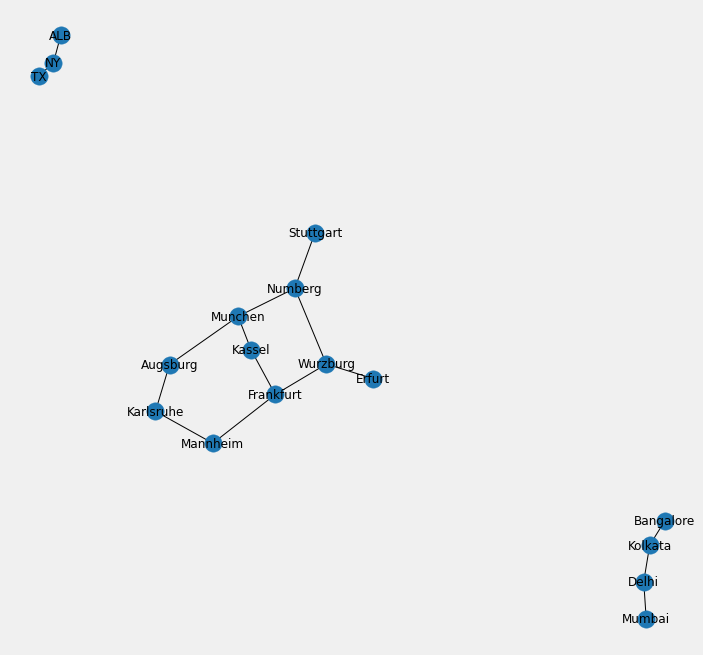

In [22]:
'''
['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']
 '''
g = nx.Graph()
for edge in edgelist:
    g.add_edge(edge[0],edge[1], weight = edge[2])

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (11, 11)

pos = nx.spring_layout(g)

# drawing nodes
nx.draw_networkx(g,pos)
plt.axis('off')
plt.show()

# Connected Component

In [4]:
for i, x in enumerate(nx.connected_components(g)):
    print("cc"+str(i)+":",x)

cc0: {'Munchen', 'Numberg', 'Wurzburg', 'Stuttgart', 'Kassel', 'Erfurt', 'Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'}
cc1: {'Delhi', 'Kolkata', 'Mumbai', 'Bangalore'}
cc2: {'NY', 'ALB', 'TX'}


#  Shortest paths

In [5]:
print(nx.shortest_path(g, 'Stuttgart','Frankfurt',weight='weight'))
print(nx.shortest_path_length(g, 'Stuttgart','Frankfurt',weight='weight'))


['Stuttgart', 'Numberg', 'Wurzburg', 'Frankfurt']
503


In [6]:
for x in nx.all_pairs_dijkstra_path(g,weight='weight'):
    print(x)

('Mannheim', {'Mannheim': ['Mannheim'], 'Frankfurt': ['Mannheim', 'Frankfurt'], 'Karlsruhe': ['Mannheim', 'Karlsruhe'], 'Augsburg': ['Mannheim', 'Karlsruhe', 'Augsburg'], 'Kassel': ['Mannheim', 'Frankfurt', 'Kassel'], 'Wurzburg': ['Mannheim', 'Frankfurt', 'Wurzburg'], 'Munchen': ['Mannheim', 'Karlsruhe', 'Augsburg', 'Munchen'], 'Erfurt': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Mannheim', 'Frankfurt', 'Wurzburg', 'Numberg', 'Stuttgart']})
('Frankfurt', {'Frankfurt': ['Frankfurt'], 'Mannheim': ['Frankfurt', 'Mannheim'], 'Kassel': ['Frankfurt', 'Kassel'], 'Wurzburg': ['Frankfurt', 'Wurzburg'], 'Karlsruhe': ['Frankfurt', 'Mannheim', 'Karlsruhe'], 'Augsburg': ['Frankfurt', 'Mannheim', 'Karlsruhe', 'Augsburg'], 'Munchen': ['Frankfurt', 'Wurzburg', 'Numberg', 'Munchen'], 'Erfurt': ['Frankfurt', 'Wurzburg', 'Erfurt'], 'Numberg': ['Frankfurt', 'Wurzburg', 'Numberg'], 'Stuttgart': ['Frankfurt', 'Wurzburg', 'Numb

# Minimum Spanning Tree

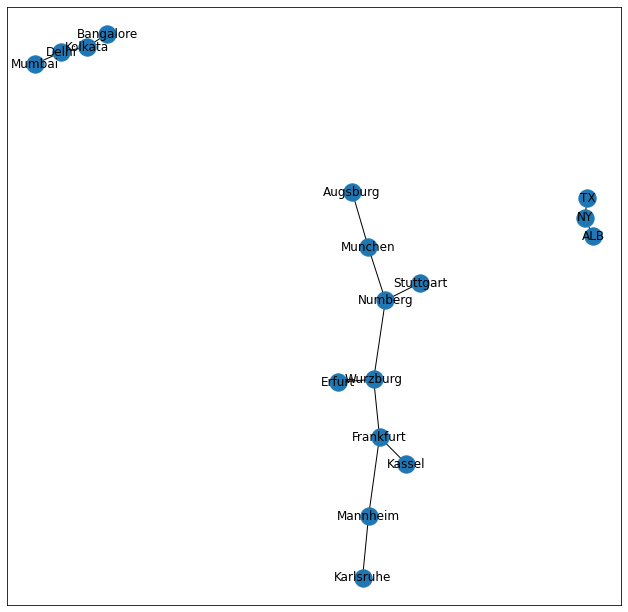

In [7]:
nx.draw_networkx(nx.minimum_spanning_tree(g))

# 4. Pagerank

In [11]:
# reading the dataset

fb = nx.read_edgelist('data.txt', create_using = nx.Graph(), nodetype = int)

In [12]:
print(nx.info(fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


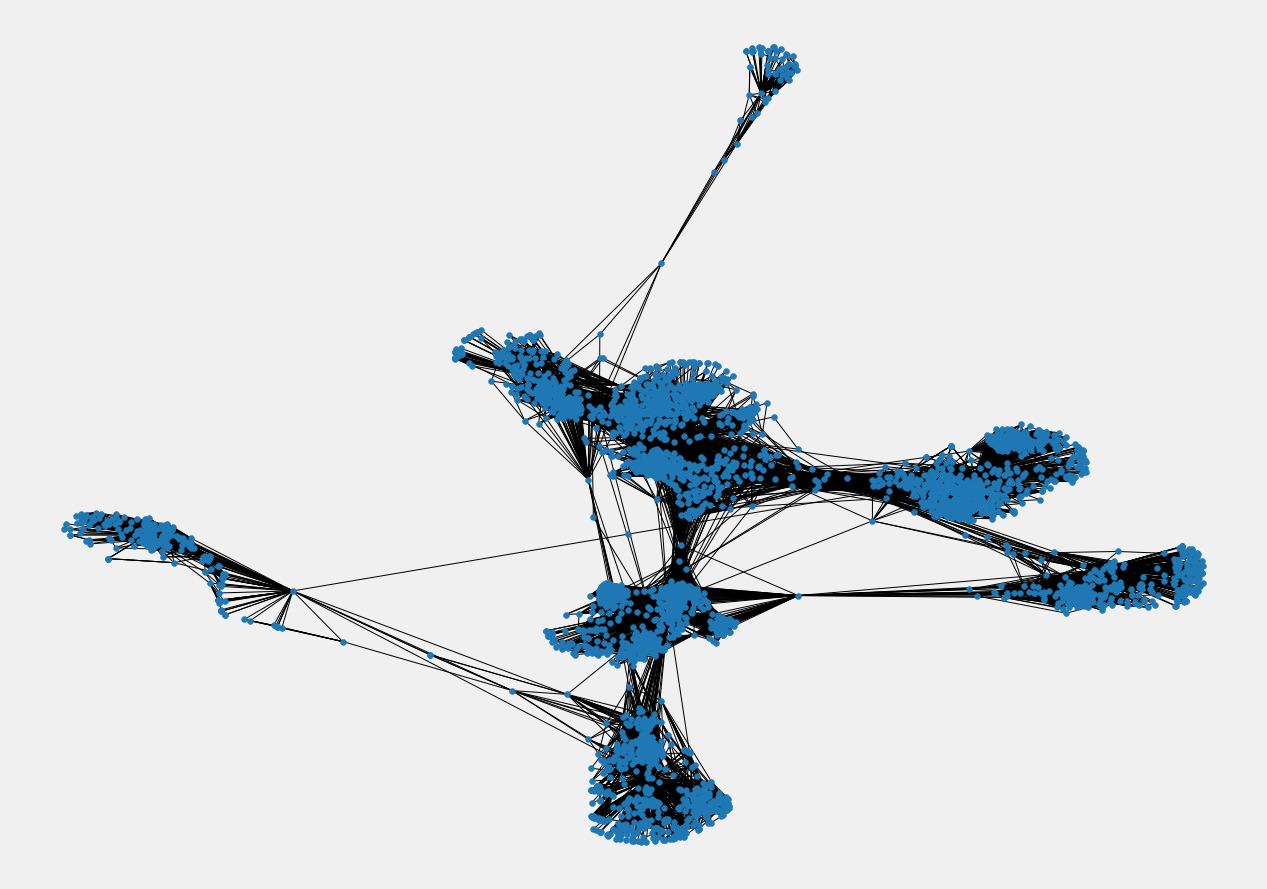

In [13]:
pos = nx.spring_layout(fb)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')
nx.draw_networkx(fb, pos, with_labels = False, node_size = 35)
plt.show()

In [14]:
pagerank = nx.pagerank(fb)

In [15]:
import operator
sorted_pagerank = sorted(pagerank.items(), key=operator.itemgetter(1),reverse=True)
print(sorted_pagerank[:5])

[(3437, 0.007614586844749603), (107, 0.006936420955866114), (1684, 0.0063671621383068295), (0, 0.006289602618466542), (1912, 0.0038769716008844974)]


In [16]:
first_degree_connected_nodes = list(fb.neighbors(3437))
second_degree_connected_nodes = []
for x in first_degree_connected_nodes:
    second_degree_connected_nodes+=list(fb.neighbors(x))
second_degree_connected_nodes.remove(3437)
second_degree_connected_nodes = list(set(second_degree_connected_nodes))

subgraph_3437 = nx.subgraph(fb,first_degree_connected_nodes+second_degree_connected_nodes,)


In [17]:
pos = nx.spring_layout(subgraph_3437)

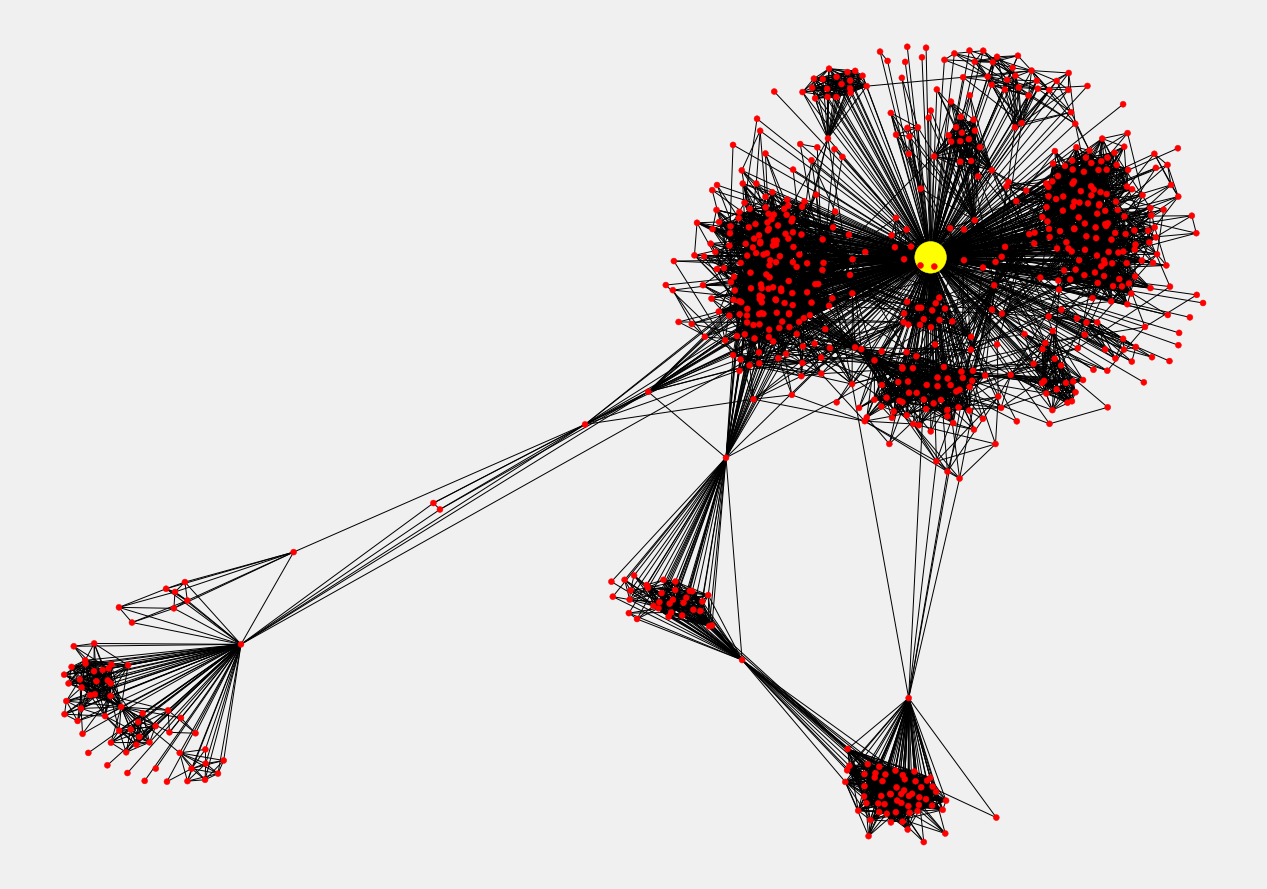

In [18]:
import warnings
warnings.filterwarnings('ignore')
node_color = ['yellow' if v == 3437 else 'red' for v in subgraph_3437]
node_size =  [1000 if v == 3437 else 35 for v in subgraph_3437]
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 15)
plt.axis('off')

nx.draw_networkx(subgraph_3437, pos, with_labels = False, node_color=node_color,node_size=node_size )
plt.show()

# 5. Centrality

In [19]:
pos = nx.spring_layout(subgraph_3437)
betweennessCentrality = nx.betweenness_centrality(subgraph_3437,normalized=True, endpoints=True)

(-0.8246026054024697,
 0.46932354718446734,
 -0.4990477755665779,
 1.0713832274079322)

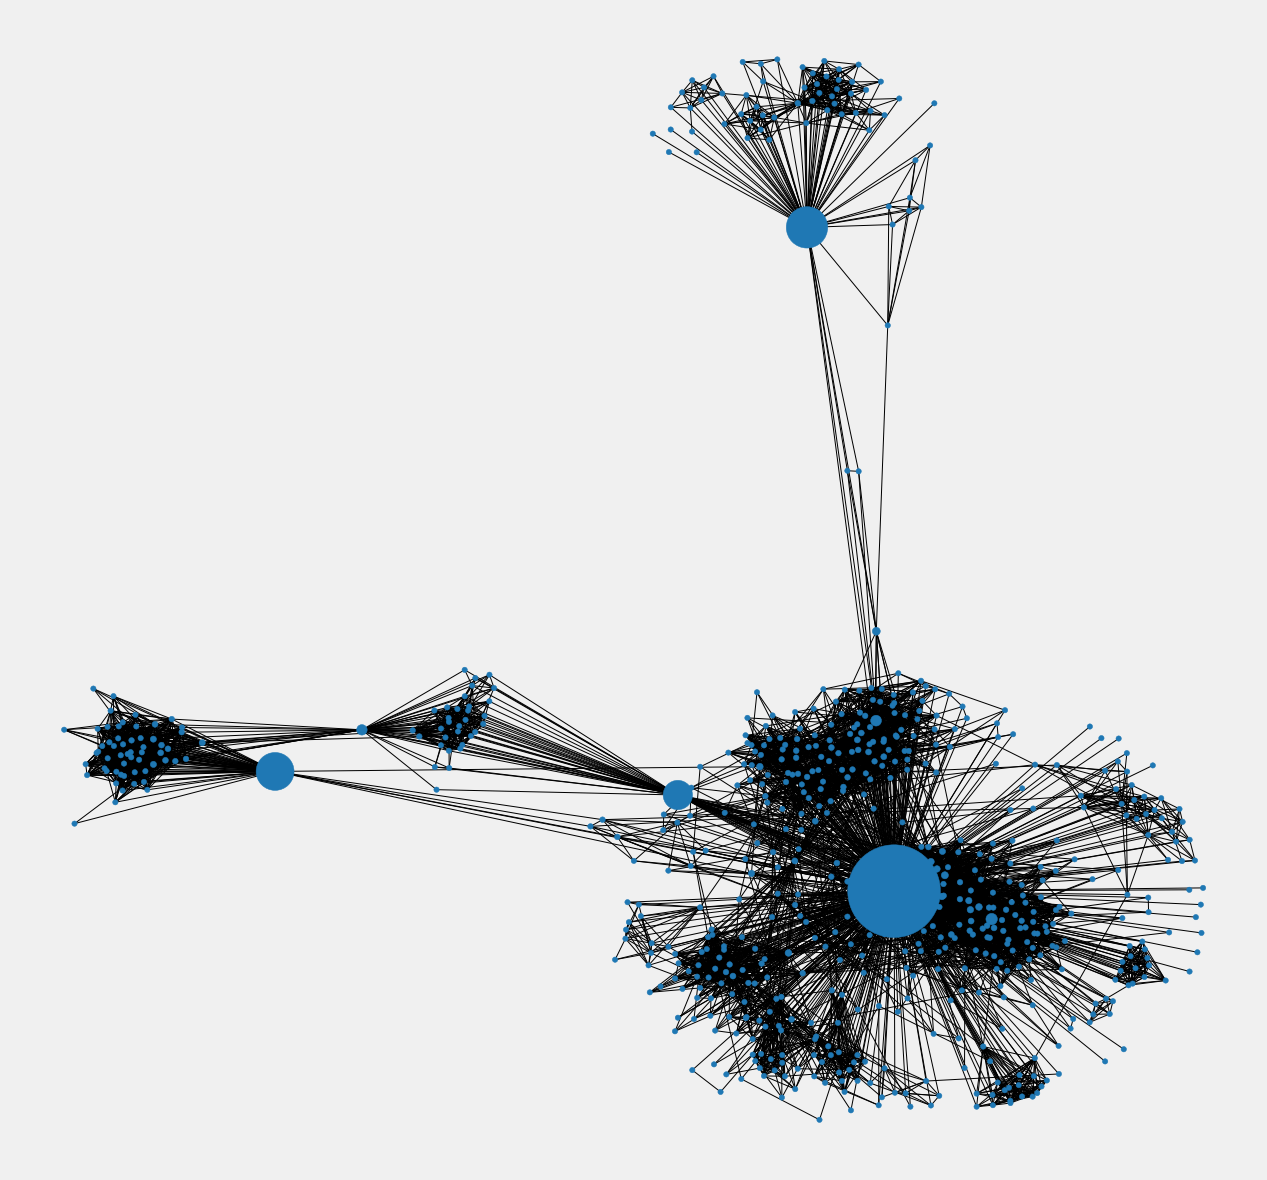

In [20]:
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(subgraph_3437, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')